# Timeseries in R tutorial with an empirical SE bent.

by Abram Hindle <hindle1@ualberta.ca>

### Thorough Resources:

* Welcome to a Little Book of R for Time Series!¶ https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/
* ARIMA models for time series forecasting http://people.duke.edu/~rnau/411arim.htm 
* Book on Timeseries analysis http://db.ucsd.edu/static/TimeSeries.pdf
* ARIMA Modelling (pretty indepth) https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
* Time Series Analysis with R http://r-statistics.co/Time-Series-Analysis-With-R.html
* Using R for Time Series Analysis¶ https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/src/timeseries.html

### Videos:

* https://www.youtube.com/watch?v=gj4L2isnOf8

What are timeseries?

* A series of measurement over time

What is timeseries modelling?

* Usually a modelling of a timeseries. 
* Autoregressive - the measurements are used to predict future measurements
  * rainfall
  * Temperature
  * Weather
* Address seasonality


Typical timeseries models take the measurements as inputs and predict outputs into the future.

ARIMA is a popular autoregressive model for time series forecasting.

It was 3 parameters often called order (p,d,q). You can discover them via model fitting or set them based on observation.

Robert Nau says from ARIMA models for time series forecasting http://people.duke.edu/~rnau/411arim.htm 

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:

*    p is the number of autoregressive terms,
*    d is the number of nonseasonal differences needed for stationarity, and
*    q is the number of lagged forecast errors in the prediction equation. 

In [1]:
# Taken from Dan Han's introduction

data(LakeHuron)
fit <- arima(LakeHuron, order = c(1, 0, 1))
fit


Call:
arima(x = LakeHuron, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.7449  0.3206   579.0555
s.e.  0.0777  0.1135     0.3501

sigma^2 estimated as 0.4749:  log likelihood = -103.25,  aic = 214.49

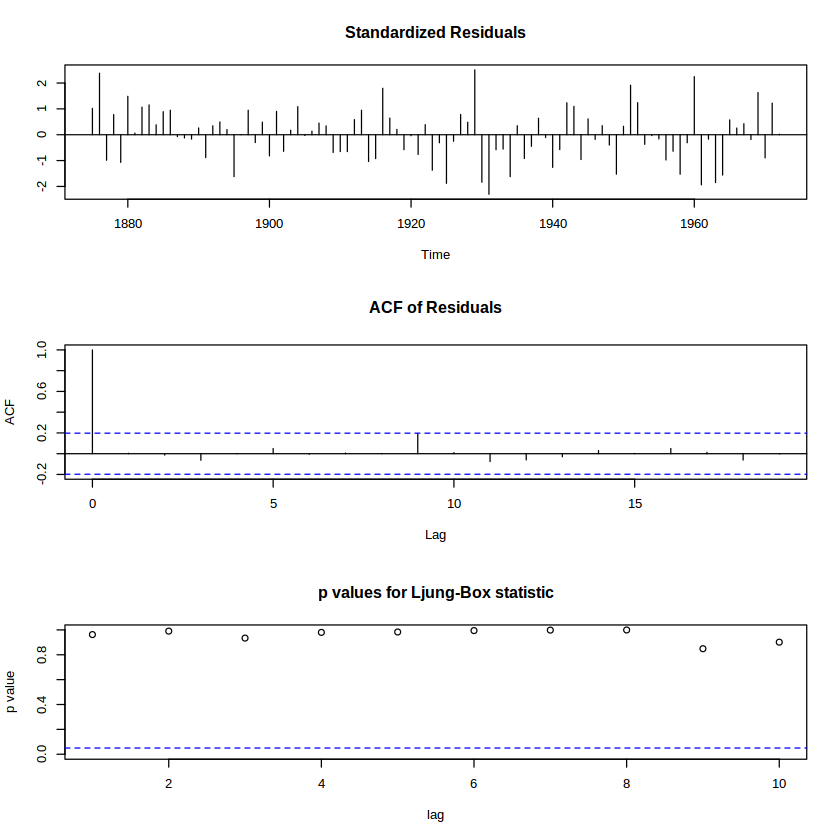

In [3]:
tsdiag(fit)

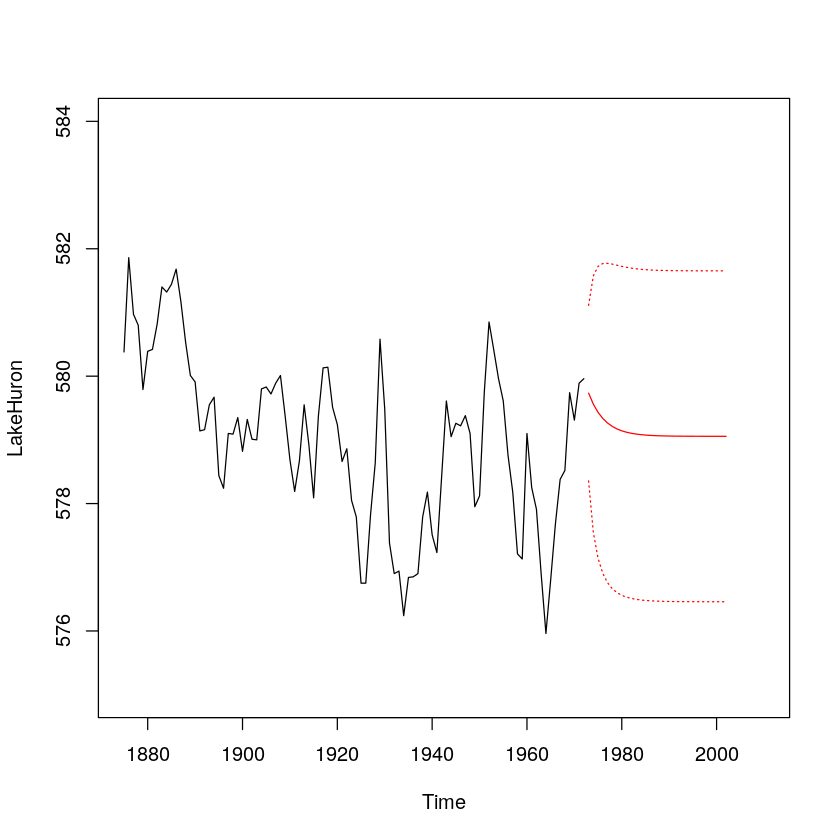

In [2]:
fit <- arima(LakeHuron, order = c(1, 0, 1))
plot(LakeHuron, xlim = c(1875, 1980+30), ylim = c(575, 584))
LH.pred <- predict(fit, n.ahead = 30)
lines(LH.pred$pred, col = "red")
lines(LH.pred$pred + 2*LH.pred$se, col = "red", lty = 3)
lines(LH.pred$pred - 2*LH.pred$se, col = "red", lty = 3)

In [3]:
v <- read.csv("data/ff-run.csv")

In [4]:
summary(v)

      time         id              mA              V               W        
 Min.   :  0.019   B:10666   Min.   :138.3   Min.   :3.980   Min.   :0.562  
 1st Qu.: 52.525             1st Qu.:223.1   1st Qu.:4.070   1st Qu.:0.910  
 Median :105.018             Median :228.3   Median :4.080   Median :0.931  
 Mean   :105.022             Mean   :268.9   Mean   :4.075   Mean   :1.095  
 3rd Qu.:157.513             3rd Qu.:247.7   3rd Qu.:4.080   3rd Qu.:1.011  
 Max.   :210.007             Max.   :865.9   Max.   :4.130   Max.   :3.464  

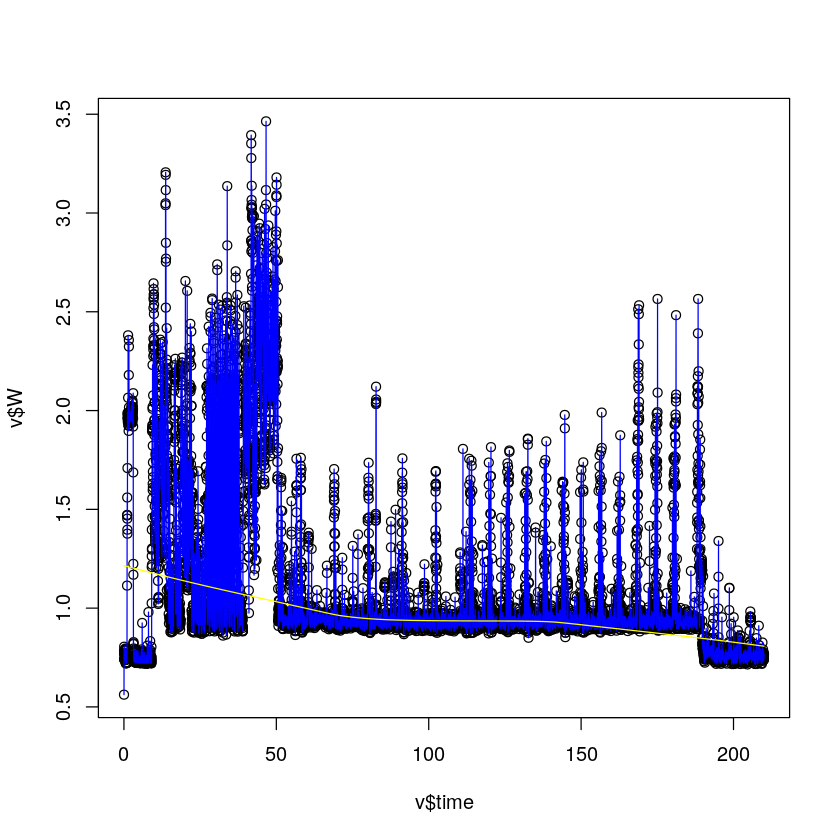

In [5]:
plot(v$time,v$W)
lines(v$time,v$W,col=c("blue"))
lines(lowess(v$time,v$W),col=c("yellow"))

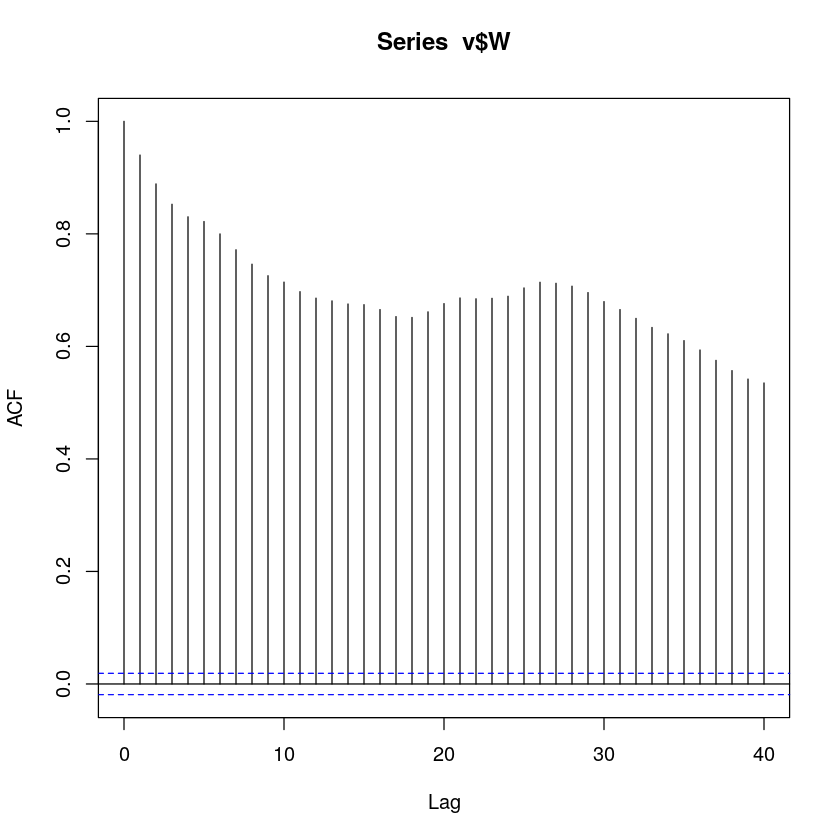

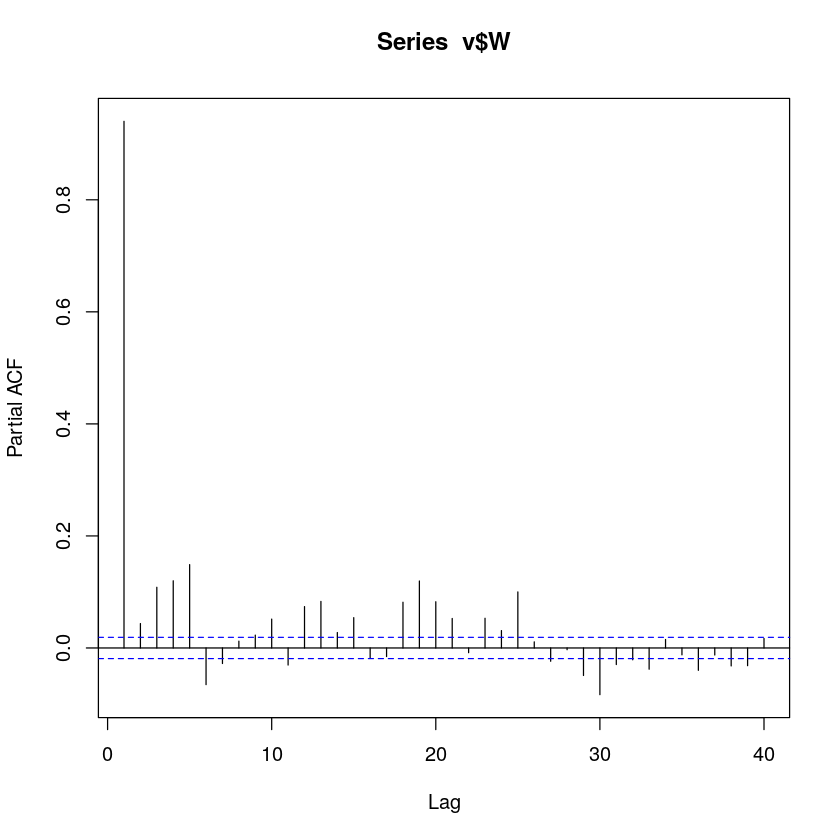

In [6]:
acf(v$W) # auto correlation of watts
pacf(v$W) # partial auto correlation watts

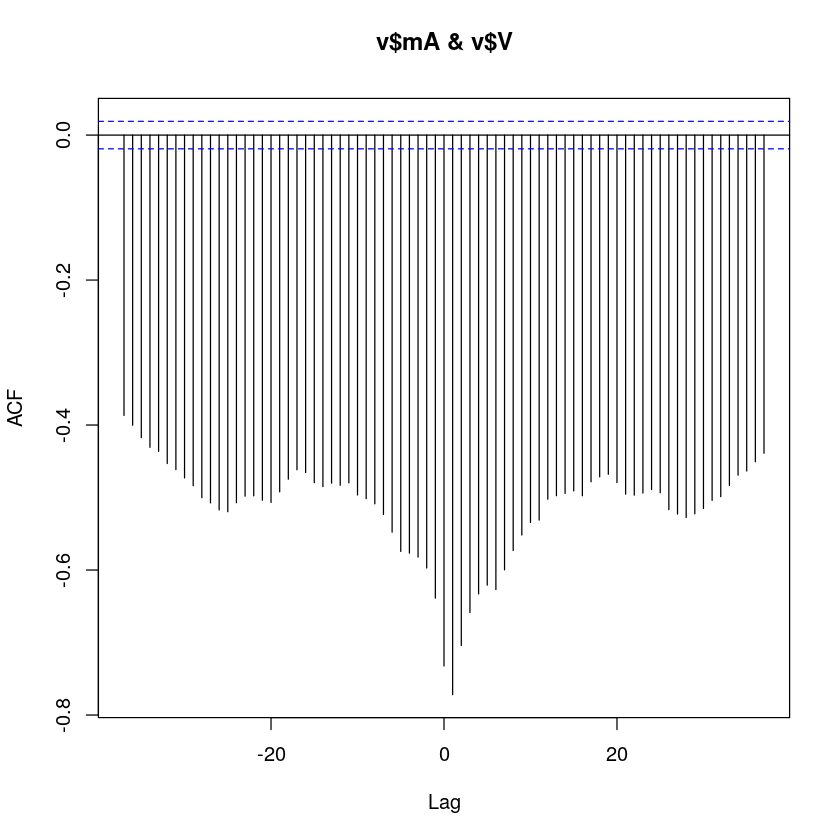

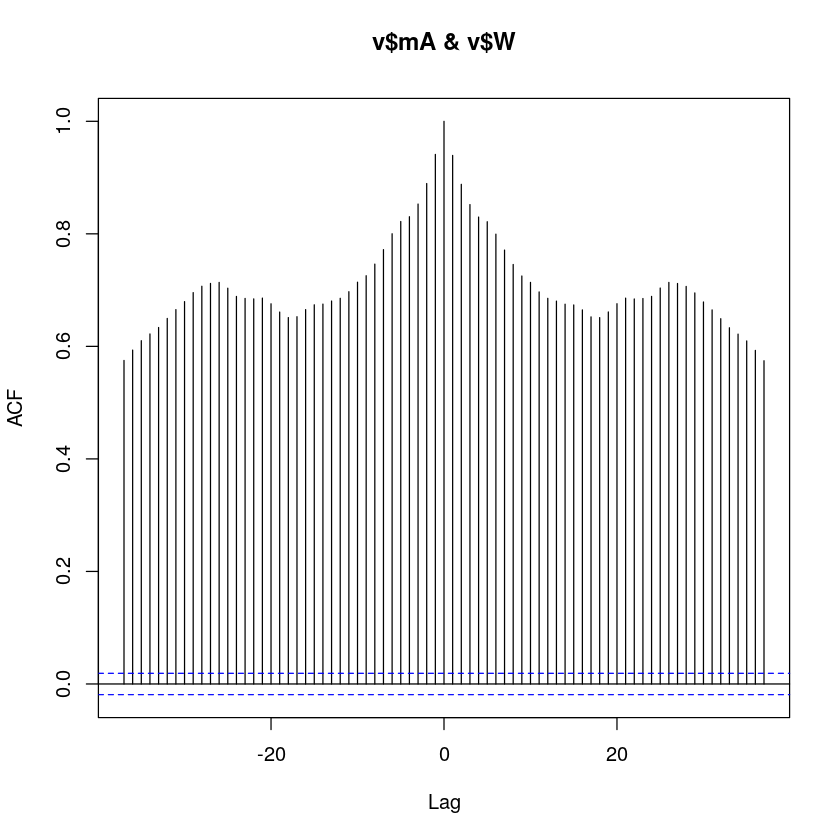

In [7]:
ccf(v$mA,v$V) # cross correlation of Amps and Volts
ccf(v$mA,v$W) # cross correlation of Amps and Watts

In [8]:
vfit <- arima(v$W,order = c(6, 0, 1))

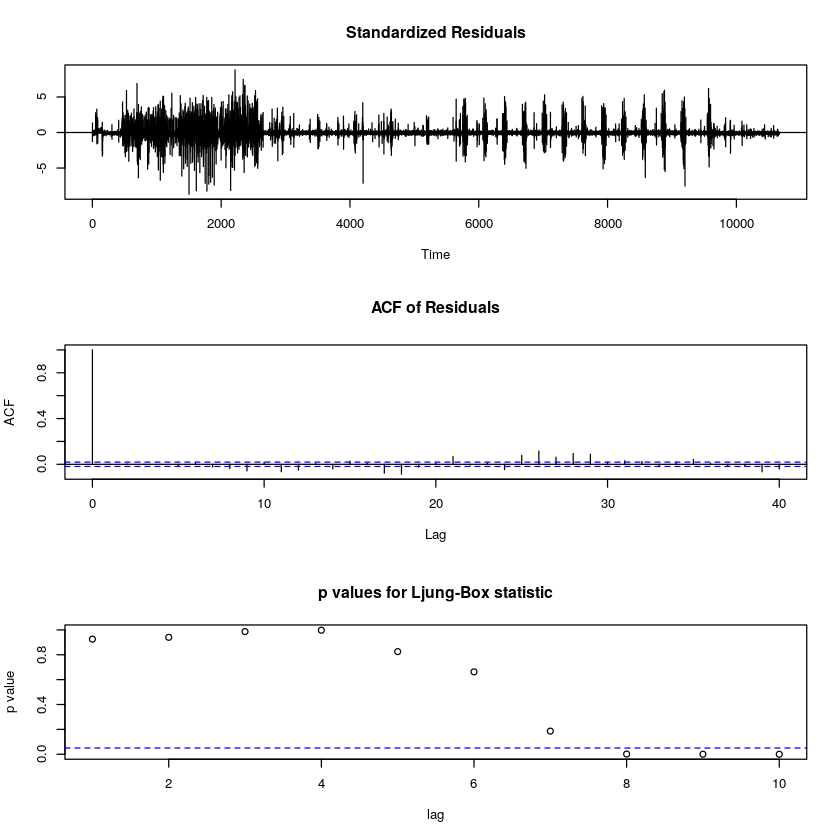

In [9]:
tsdiag(vfit)

Obviously the ARIMA needs a bit of configuration.

In [10]:
# apt-get install r-cran-rcpparmadillo
# install.packages("forecast")
library(forecast)

In [11]:
vfit <- auto.arima(v$W, seasonal=FALSE)
vfit

Series: v$W 
ARIMA(5,1,5) 

Coefficients:
         ar1      ar2      ar3      ar4     ar5      ma1     ma2      ma3
      0.0286  -0.2022  -0.0238  -0.1852  0.6505  -0.1577  0.0620  -0.1293
s.e.  0.0276   0.0282   0.0317   0.0308  0.0224   0.0296  0.0332   0.0389
         ma4      ma5
      0.0257  -0.6456
s.e.  0.0370   0.0297

sigma^2 estimated as 0.01903:  log likelihood=5996.81
AIC=-11971.61   AICc=-11971.59   BIC=-11891.59

In [12]:
vfit2 <- arima(v$W,order=c(5,1,5))
vfit2


Call:
arima(x = v$W, order = c(5, 1, 5))

Coefficients:
         ar1      ar2      ar3      ar4     ar5      ma1     ma2      ma3
      0.0286  -0.2022  -0.0238  -0.1852  0.6505  -0.1577  0.0620  -0.1293
s.e.  0.0276   0.0282   0.0317   0.0308  0.0224   0.0296  0.0332   0.0389
         ma4      ma5
      0.0257  -0.6456
s.e.  0.0370   0.0297

sigma^2 estimated as 0.01901:  log likelihood = 5996.81,  aic = -11971.61

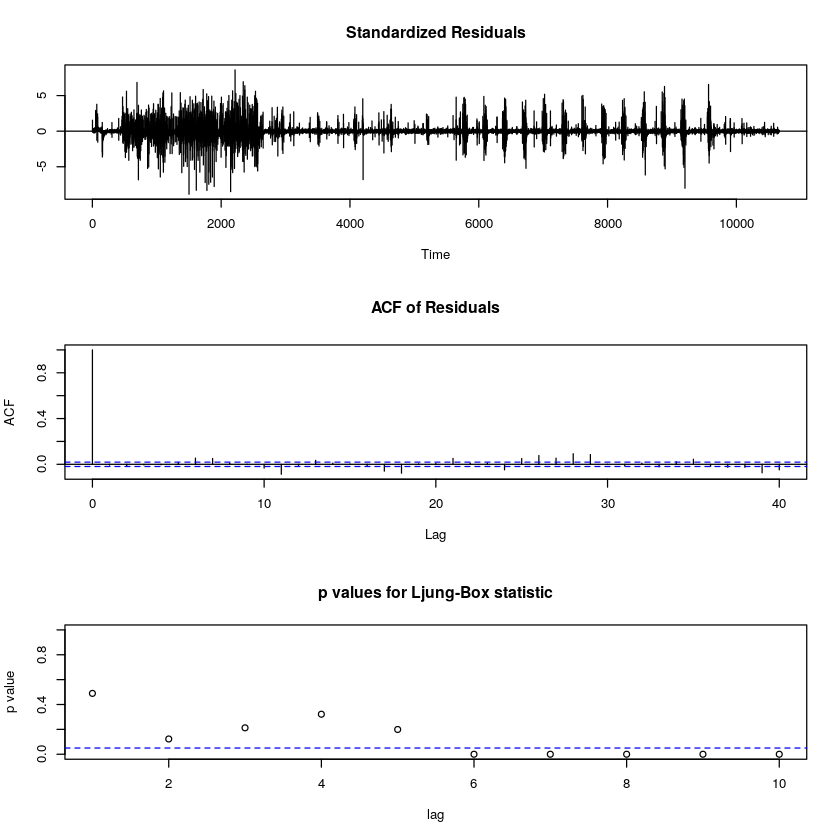

In [13]:
tsdiag(vfit2)

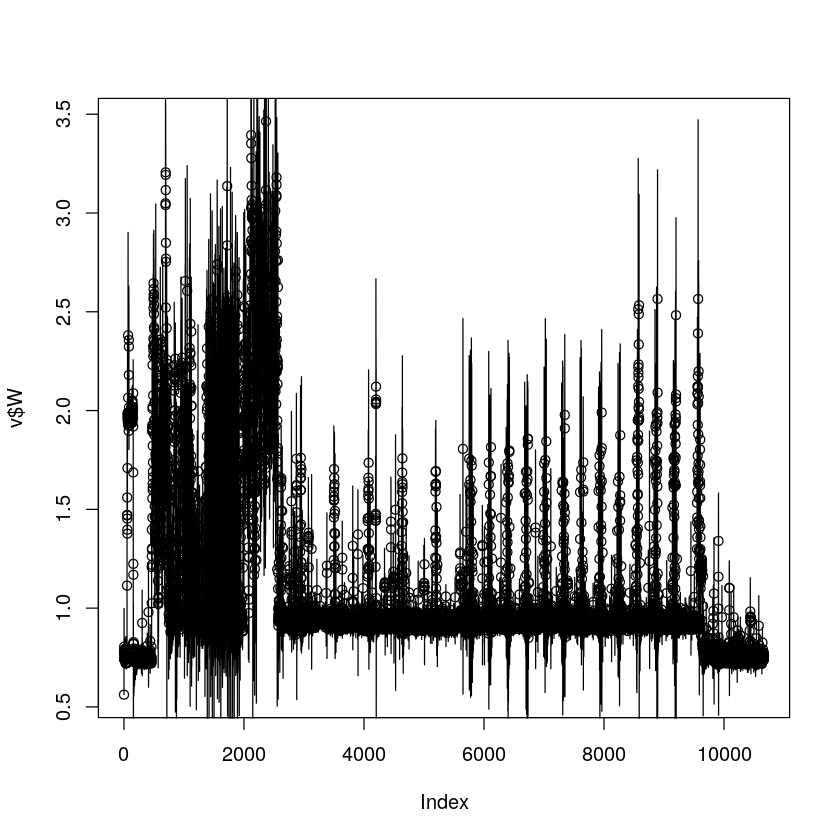

In [14]:
plot(v$W)
lines(v$W + vfit2$residuals)

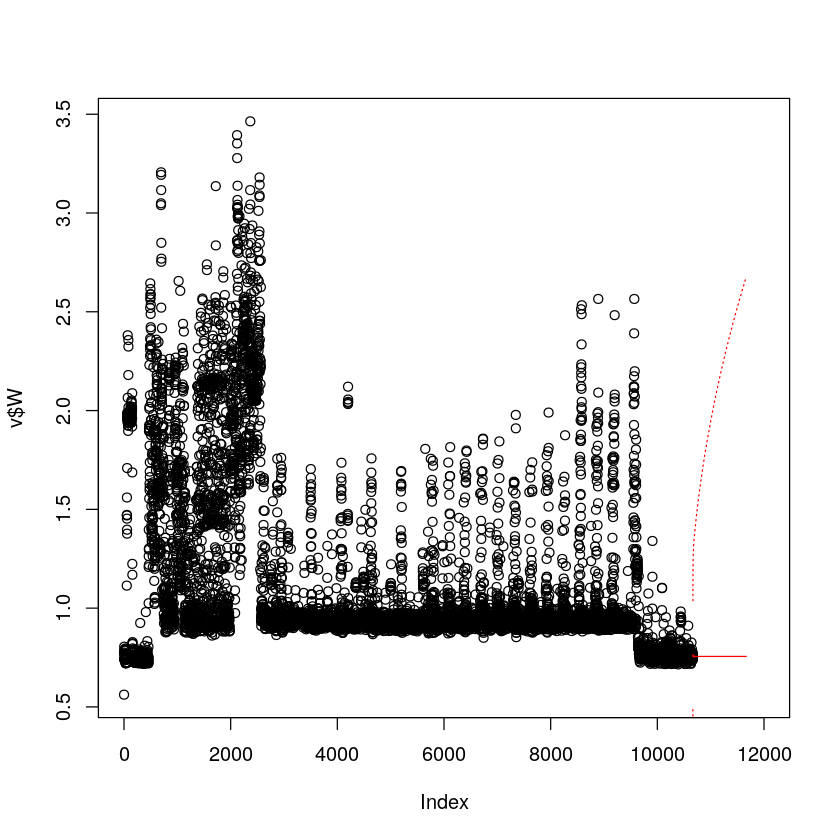

In [15]:
plot(v$W, xlim = c(0, 12000))
LH.pred <- predict(vfit2, n.ahead = 1000 )
lines(LH.pred$pred, col = "red")
lines(LH.pred$pred + 2*LH.pred$se, col = "red", lty = 3)
lines(LH.pred$pred - 2*LH.pred$se, col = "red", lty = 3)

In [16]:
v2 <- read.csv("data/vuze-aggregate.csv")
#summary(v2)
v2 <- v2[order(v2$sURI),]
v2 <- data.frame(v2)
v2a <- aggregate(v2$kwh,by=list(v2$sURI),FUN=mean)
names(v2a) <- c("jar","kwh")
v2a

jar,kwh
vuze-26730.jar,0.003985470
vuze-26731.jar,0.003858426
vuze-26732.jar,0.003736978
vuze-26734.jar,0.003673089
vuze-26735.jar,0.003661913
vuze-26737.jar,0.003978414
vuze-26738.jar,0.003807397
vuze-26744.jar,0.003935113
vuze-26745.jar,0.003389390
vuze-26747.jar,0.003329398


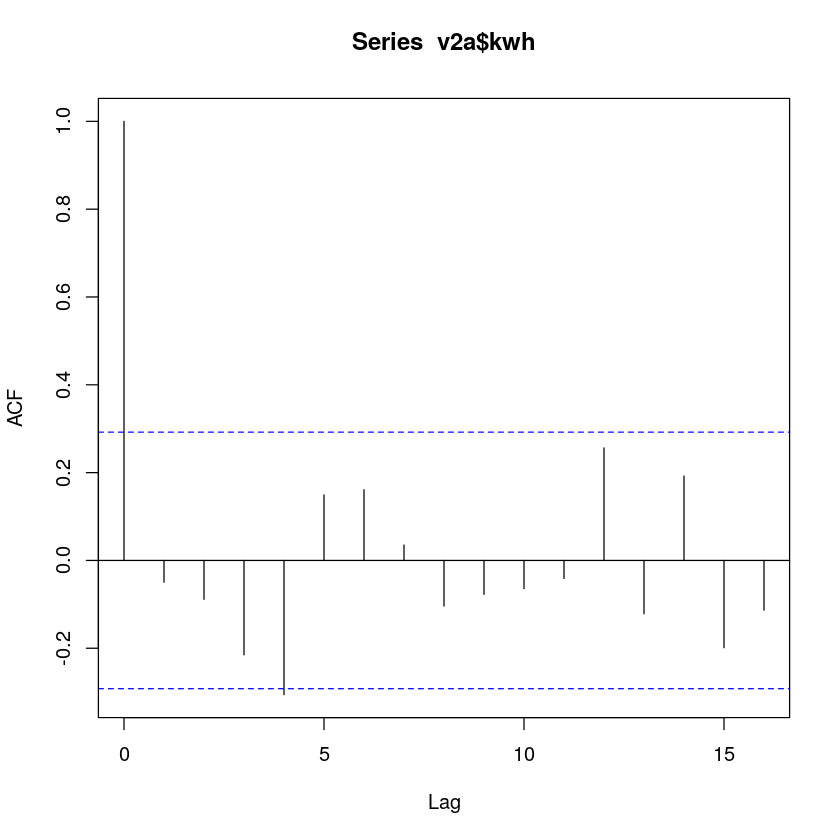

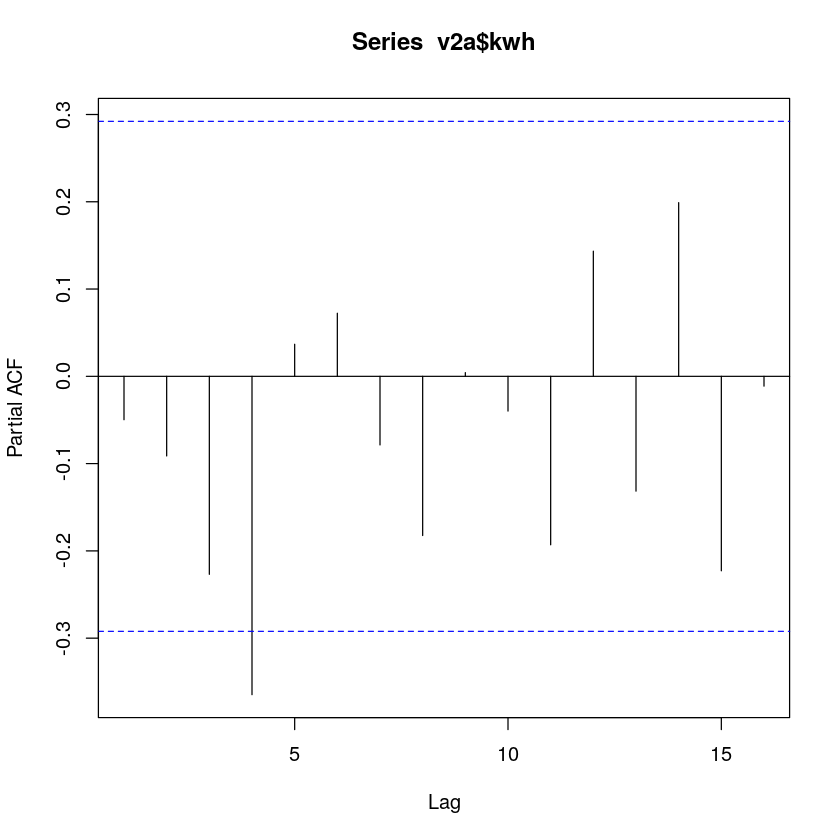

In [17]:
acf(v2a$kwh) 
pacf(v2a$kwh)

       t                x                y                  z          
 Min.   :  1.00   Min.   :0.0100   Min.   :-0.85000   Min.   :-1.7641  
 1st Qu.: 25.75   1st Qu.:0.2575   1st Qu.:-0.06383   1st Qu.:-0.1918  
 Median : 50.50   Median :0.5050   Median : 0.51190   Median : 0.5284  
 Mean   : 50.50   Mean   :0.5050   Mean   : 0.50492   Mean   : 0.5046  
 3rd Qu.: 75.25   3rd Qu.:0.7525   3rd Qu.: 1.07585   3rd Qu.: 1.2058  
 Max.   :100.00   Max.   :1.0000   Max.   : 1.84991   Max.   : 2.7479  

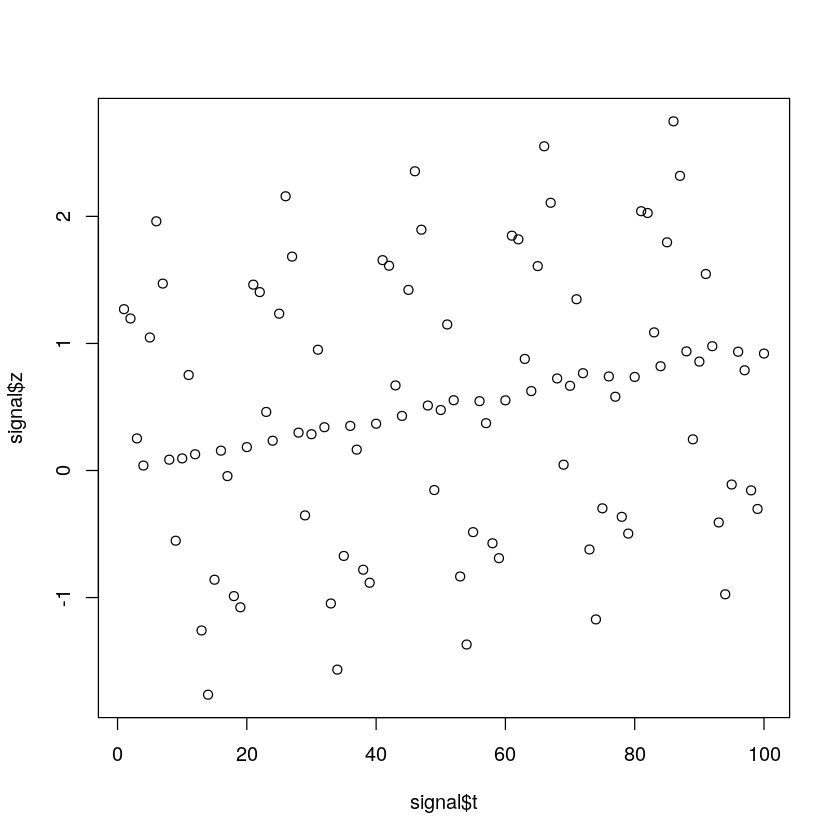

In [43]:
signal <- c()
signal$t <- c(1:100)
signal$x <- signal$t * 0.01
signal$y <- signal$x + sin(2*5*3.14*signal$t/100)
signal$z <- signal$y + sin(2*20*3.14*signal$t/100)
signal <- data.frame(signal)
summary(signal)
plot(signal$t,signal$z)




Call:
lm(formula = z ~ t, data = signal)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07320 -0.83938  0.00697  0.79567  2.05308 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.234048   0.201751   1.160    0.249
t           0.005358   0.003468   1.545    0.126

Residual standard error: 1.001 on 98 degrees of freedom
Multiple R-squared:  0.02377,	Adjusted R-squared:  0.01381 
F-statistic: 2.386 on 1 and 98 DF,  p-value: 0.1256


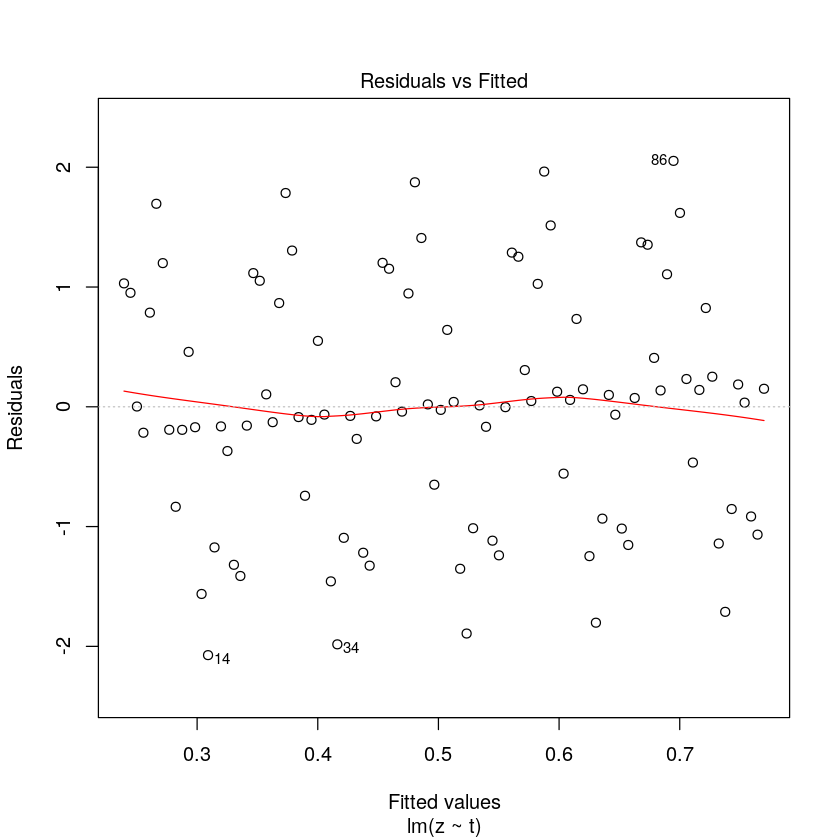

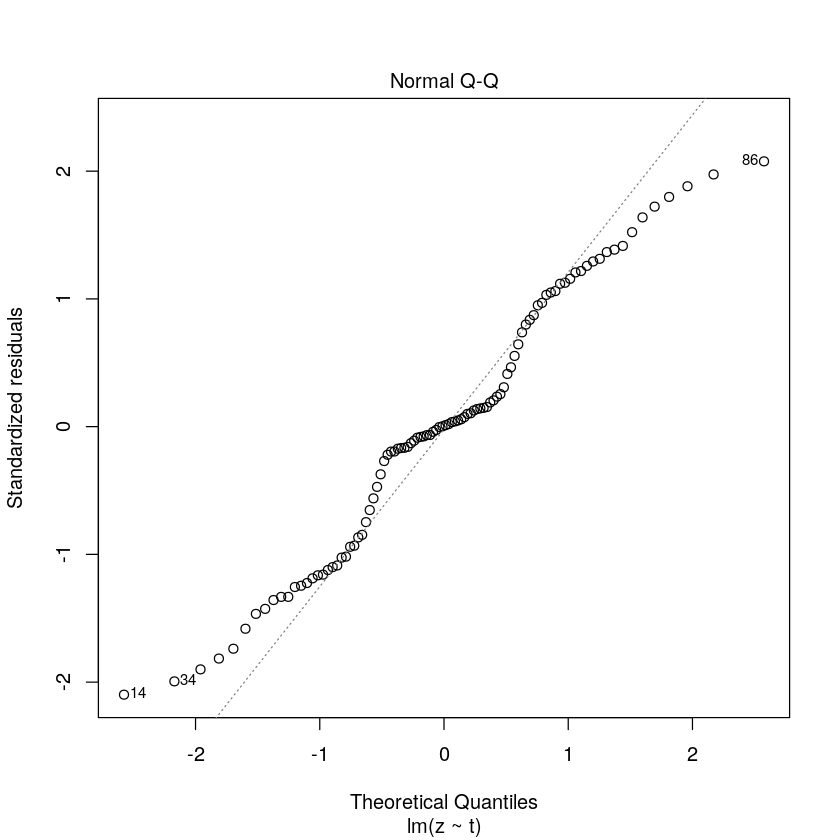

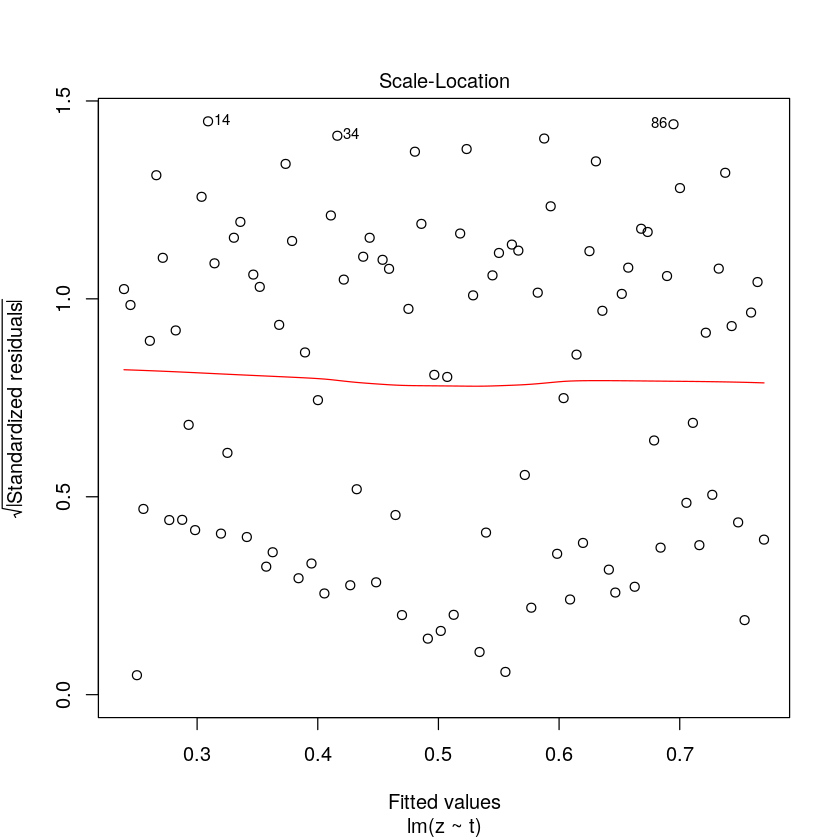

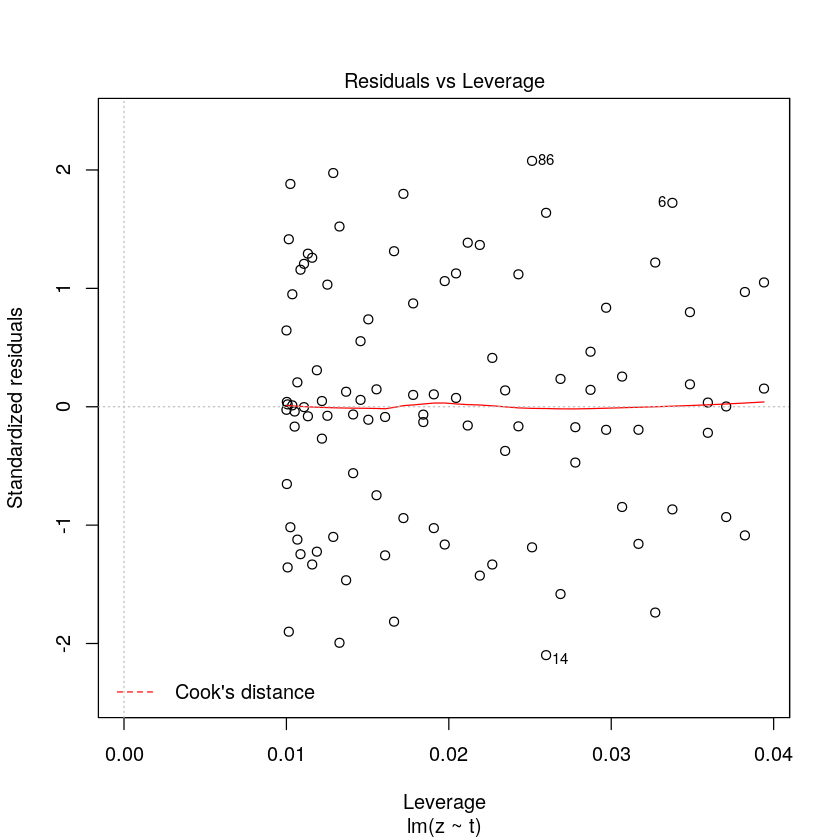

In [44]:
fit <- lm(z ~ t, data=signal)
summary(fit)
plot(fit)


Call:
lm(formula = z ~ t, data = signal)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07320 -0.83938  0.00697  0.79567  2.05308 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.234048   0.201751   1.160    0.249
t           0.005358   0.003468   1.545    0.126

Residual standard error: 1.001 on 98 degrees of freedom
Multiple R-squared:  0.02377,	Adjusted R-squared:  0.01381 
F-statistic: 2.386 on 1 and 98 DF,  p-value: 0.1256


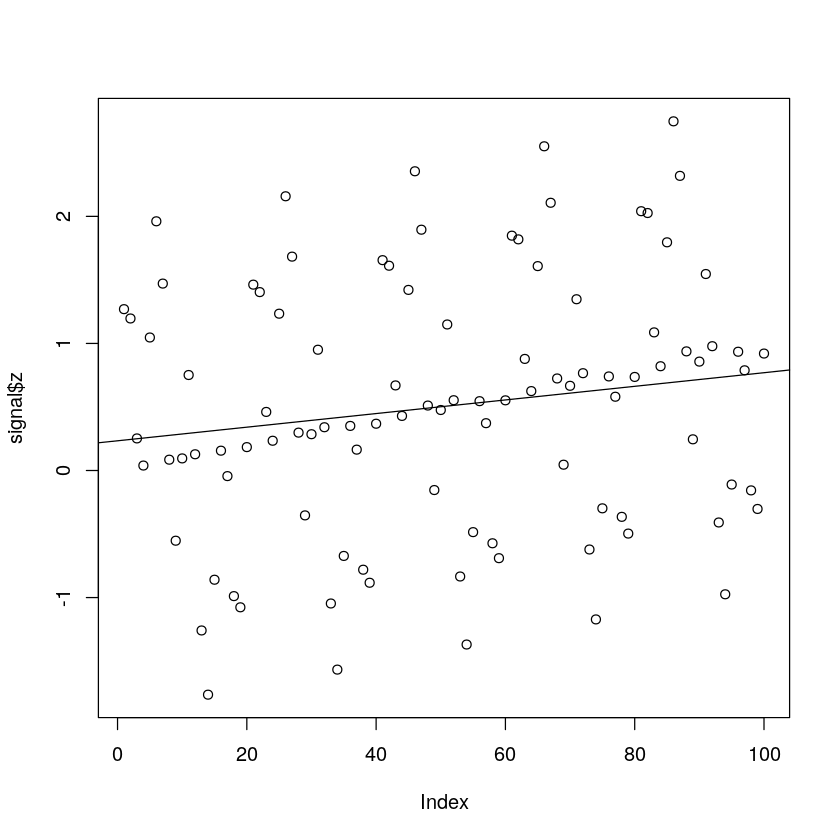

In [45]:
fit <- lm(z ~ t, data=signal)
summary(fit)
plot(signal$z)
abline(fit)


Call:
lm(formula = y ~ t, data = signal)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13472 -0.66873  0.01637  0.67149  1.13098 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.191674   0.142232   1.348   0.1809  
t           0.006203   0.002445   2.537   0.0128 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7058 on 98 degrees of freedom
Multiple R-squared:  0.06162,	Adjusted R-squared:  0.05205 
F-statistic: 6.435 on 1 and 98 DF,  p-value: 0.01277


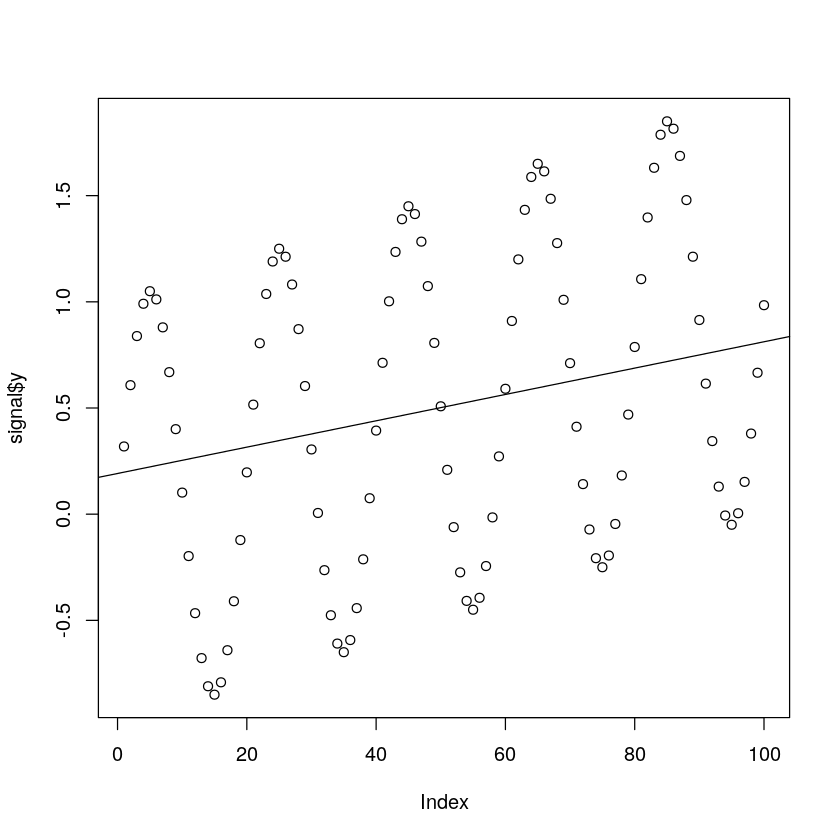

In [46]:
fit <- lm(y ~ t, data=signal)
summary(fit)
plot(signal$y)
abline(fit)

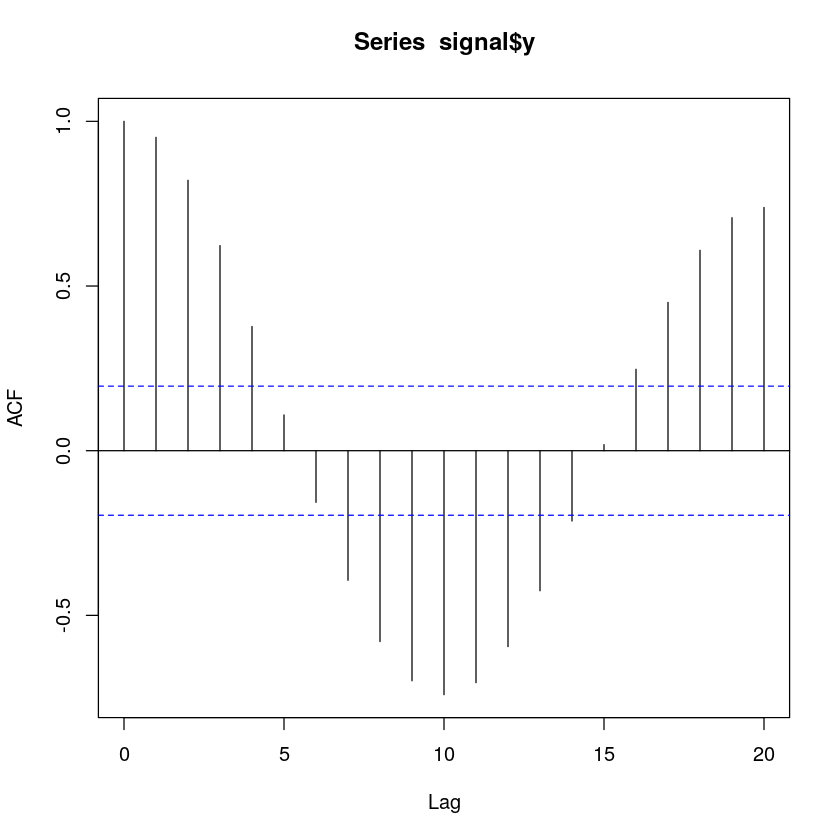

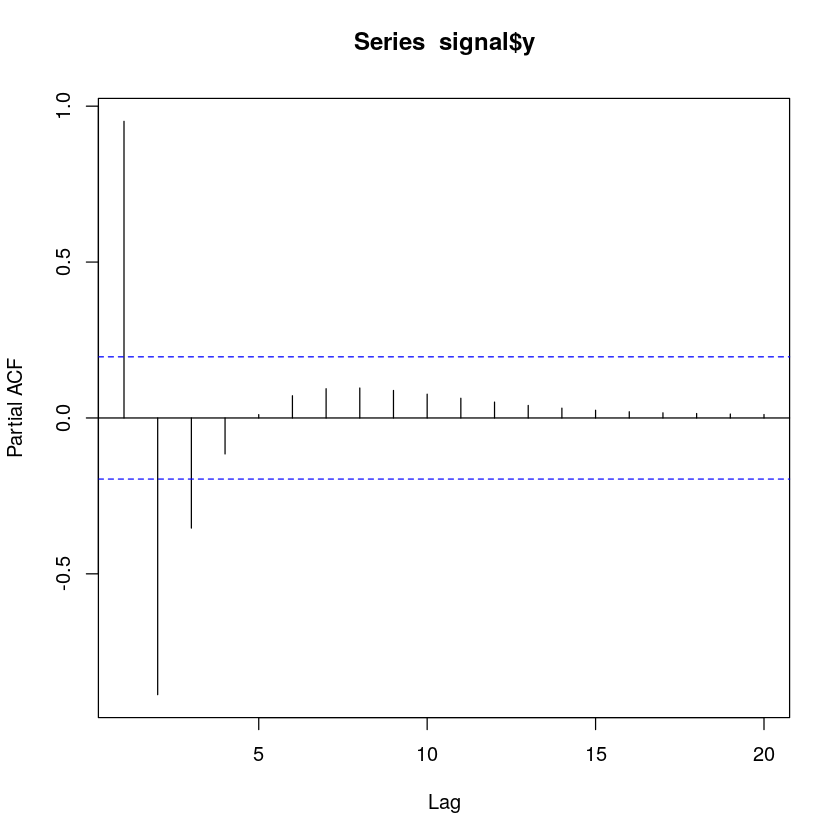

In [47]:
acf(signal$y)
pacf(signal$y)

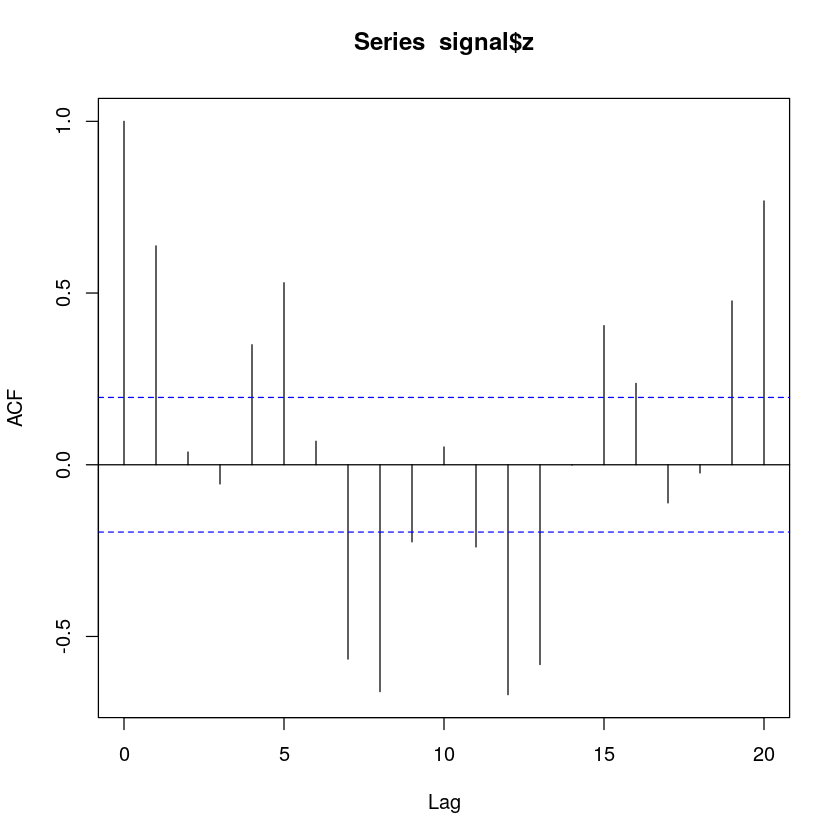

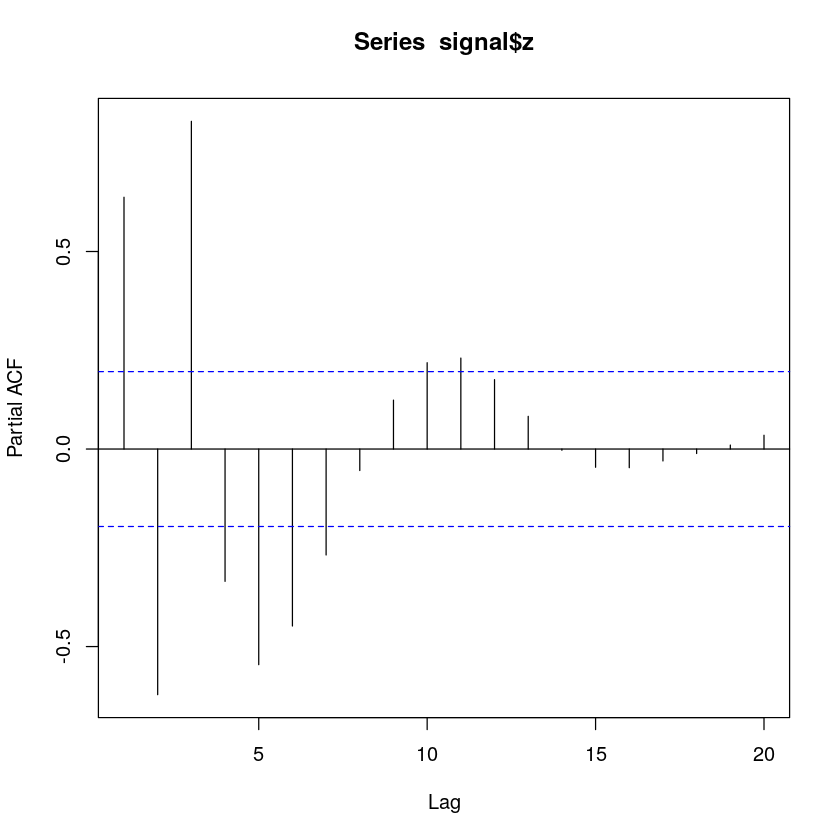

In [48]:
acf(signal$z)
pacf(signal$z)

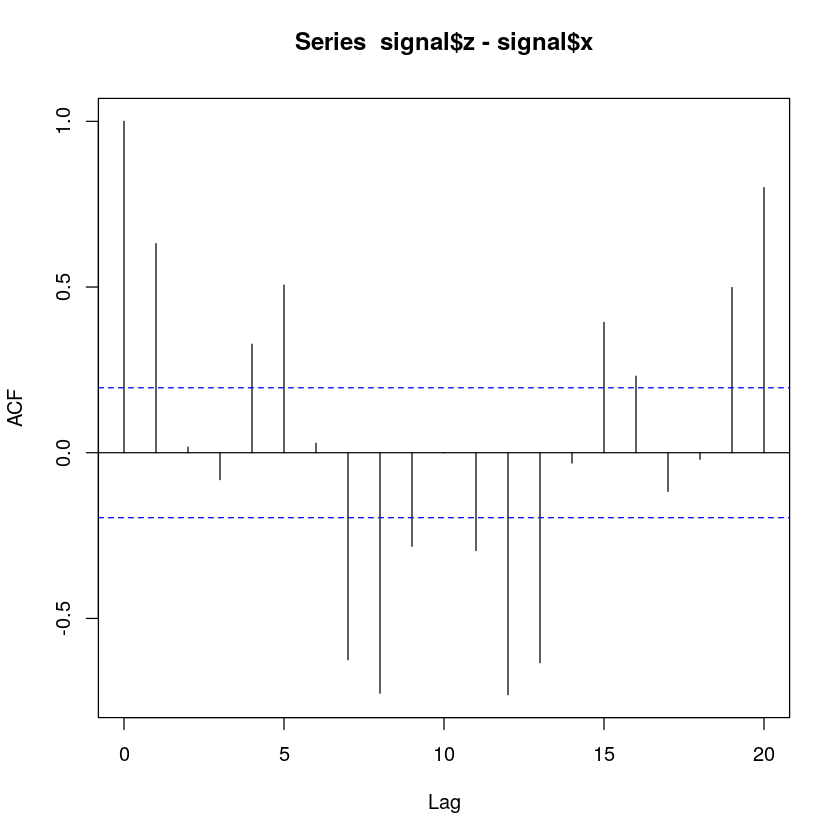

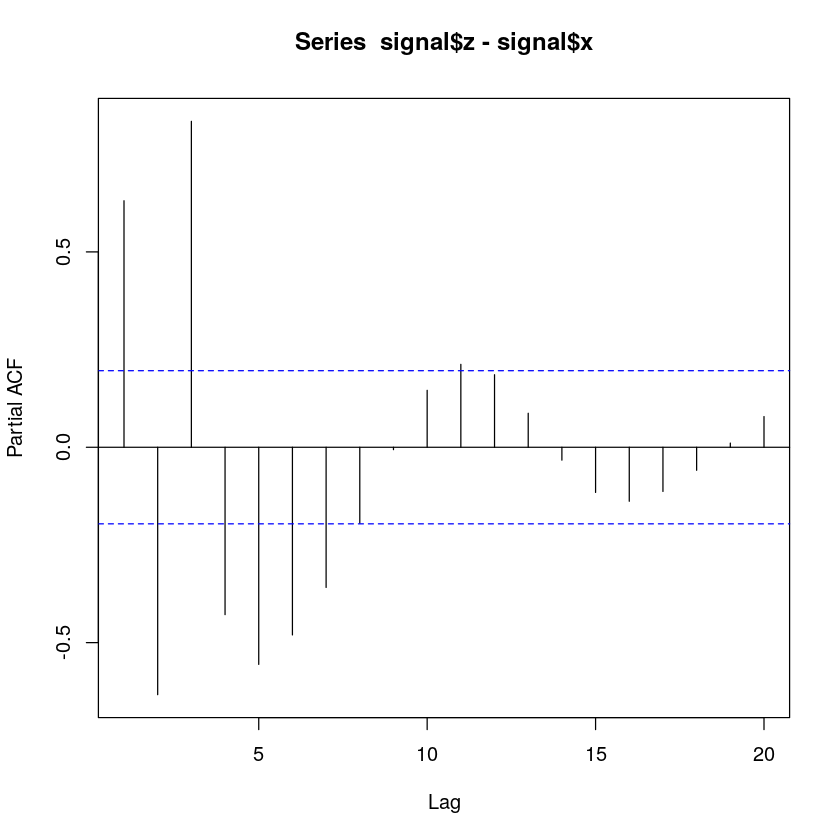

In [49]:
acf(signal$z - signal$x)
pacf(signal$z - signal$x)

In [50]:
sigafit <- auto.arima(signal$z, seasonal=TRUE)

In [51]:
sigafit

Series: signal$z 
ARIMA(3,0,0) with zero mean 

Coefficients:
         ar1      ar2     ar3
      1.6400  -1.5926  0.9094
s.e.  0.0396   0.0527  0.0365

sigma^2 estimated as 0.07286:  log likelihood=-12.8
AIC=33.59   AICc=34.01   BIC=44.01

In [52]:
sigfit <- arima(signal$z,order=c(3,0,0))
summary(sigfit)


Call:
arima(x = signal$z, order = c(3, 0, 0))

Coefficients:
         ar1      ar2     ar3  intercept
      1.6187  -1.5776  0.8883     0.5447
s.e.  0.0432   0.0538  0.0405     0.3257

sigma^2 estimated as 0.06968:  log likelihood = -11.85,  aic = 33.71

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.0007064329 0.2639604 0.2337868 4.815851 57.93942 0.3105538
                  ACF1
Training set 0.8530238


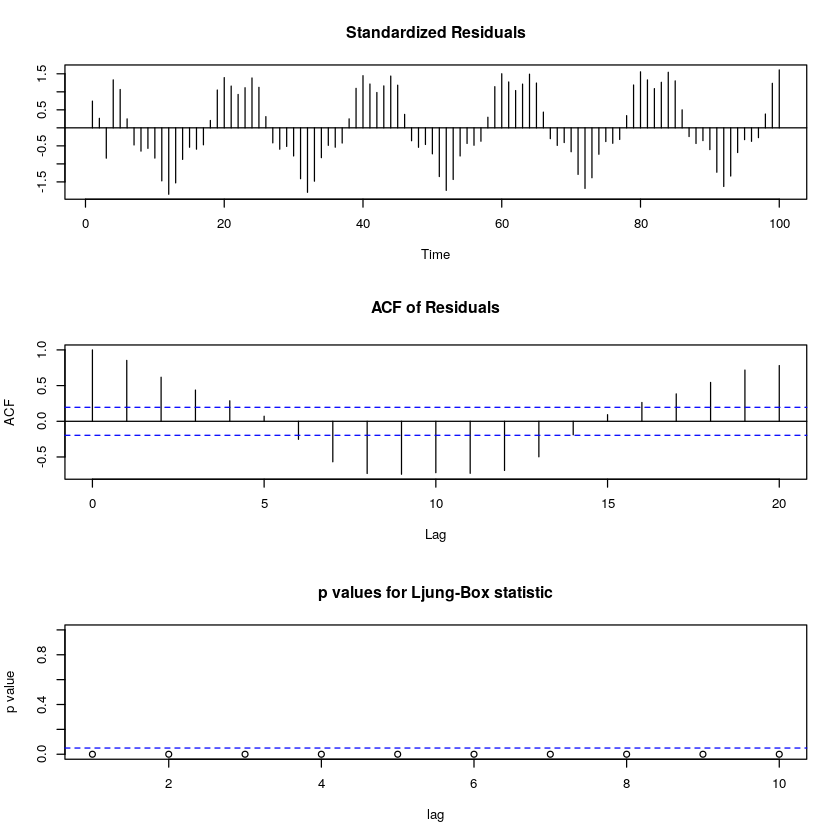

In [53]:
tsdiag(sigfit)

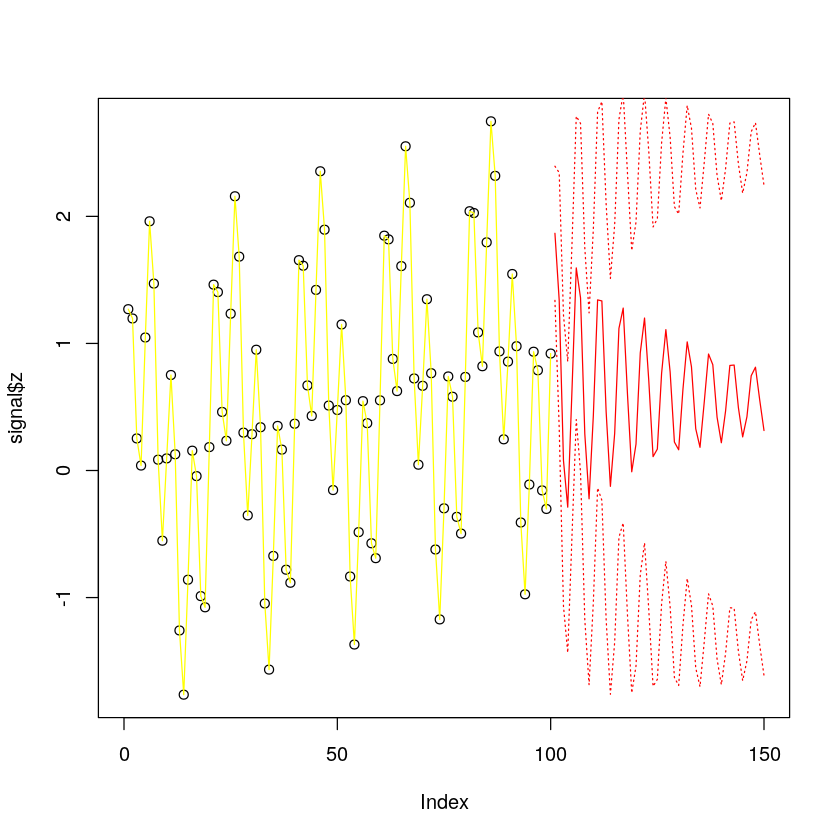

In [55]:
plot(signal$z, xlim = c(0, 150))
lines(signal$z,col=c("yellow"))
LH.pred <- predict(sigfit, n.ahead = 50 )
lines(LH.pred$pred, col = "red")
lines(LH.pred$pred + 2*LH.pred$se, col = "red", lty = 3)
lines(LH.pred$pred - 2*LH.pred$se, col = "red", lty = 3)

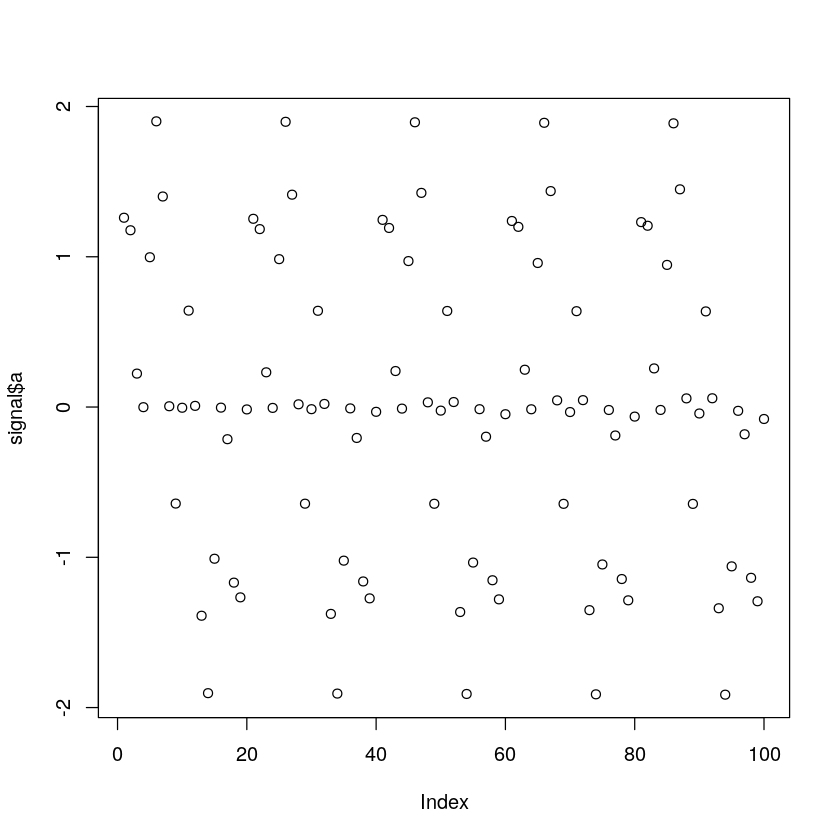

In [56]:
signal$a <- signal$z - signal$x
plot(signal$a)

In [60]:
afit <- auto.arima(signal$a,seasonal=TRUE)
names(afit)
afit

[1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"     "bic"       "aicc"      "x"         "fitted"

Series: signal$a 
ARIMA(3,0,0) with zero mean 

Coefficients:
         ar1      ar2     ar3
      1.6197  -1.5785  0.8878
s.e.  0.0434   0.0540  0.0412

sigma^2 estimated as 0.07204:  log likelihood=-11.99
AIC=31.99   AICc=32.41   BIC=42.41

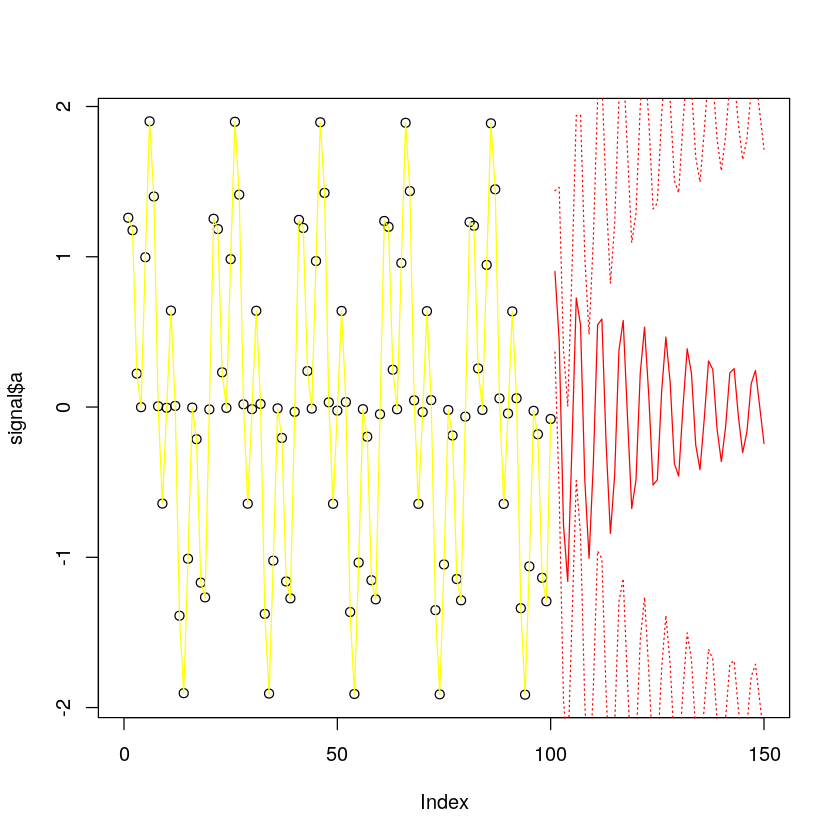

In [66]:
plot(signal$a, xlim = c(0, 150))
lines(signal$a,col=c("yellow"))
LH.pred <- predict(afit, n.ahead = 50 )
lines(LH.pred$pred, col = "red")
lines(LH.pred$pred + 2*LH.pred$se, col = "red", lty = 3)
lines(LH.pred$pred - 2*LH.pred$se, col = "red", lty = 3)

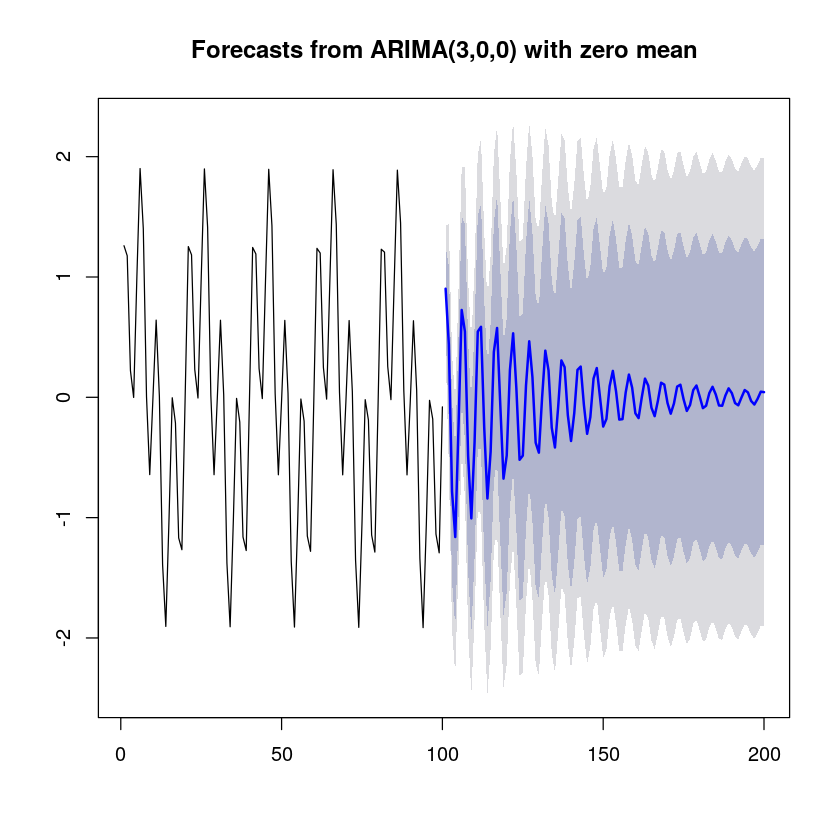

In [75]:
plot(forecast(afit,h=100))

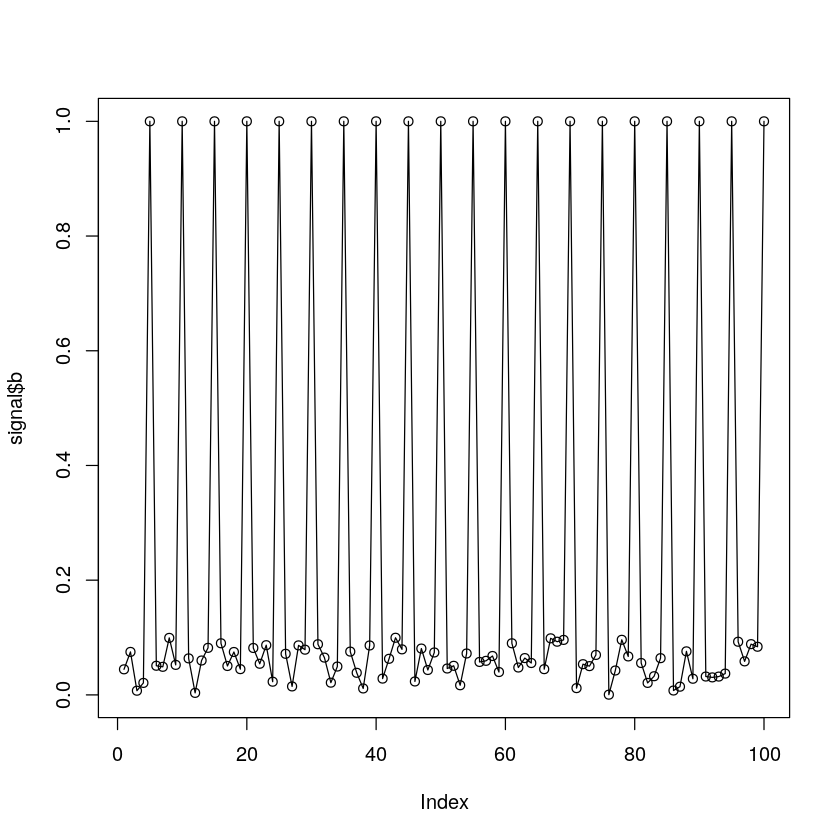

In [83]:
signal$b <- rep(0,100) + 0.1*runif(100)
signal$b[c(1:100) %% 5 == 0] = 1
plot(signal$b)
lines(signal$b)

Series: signal$b 
ARIMA(3,0,1) with non-zero mean 

Coefficients:
          ar1      ar2      ar3      ma1    mean
      -0.2665  -0.4667  -0.6030  -0.8242  0.2443
s.e.   0.0847   0.0717   0.0828   0.0488  0.0017

sigma^2 estimated as 0.04594:  log likelihood=12.56
AIC=-13.12   AICc=-12.21   BIC=2.51

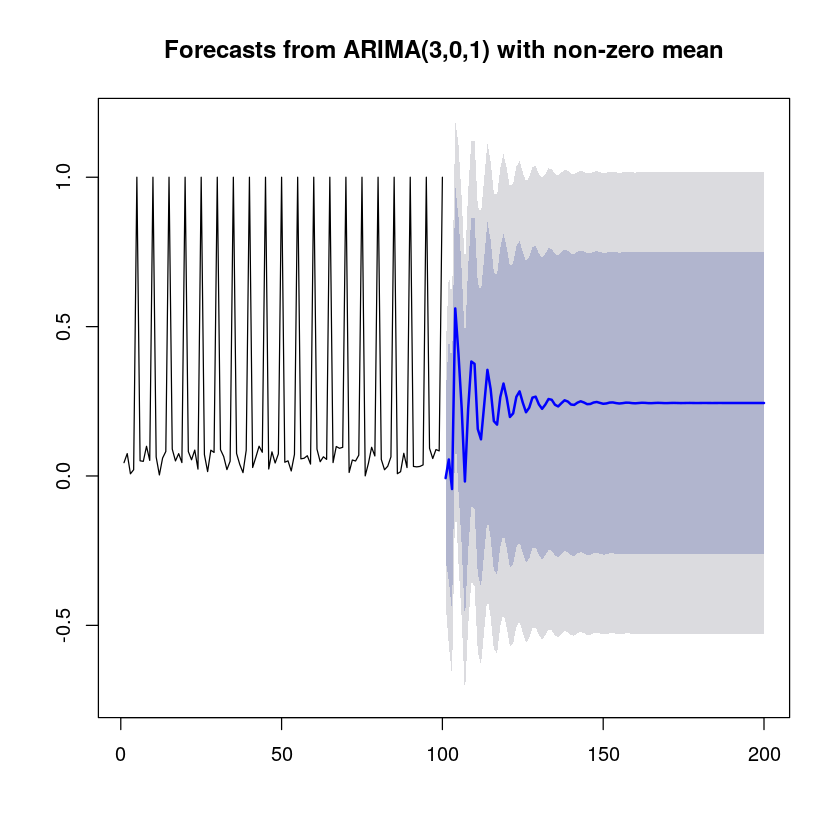

In [84]:
bfit <- auto.arima(signal$b)
bfit
plot(forecast(bfit,h=100))

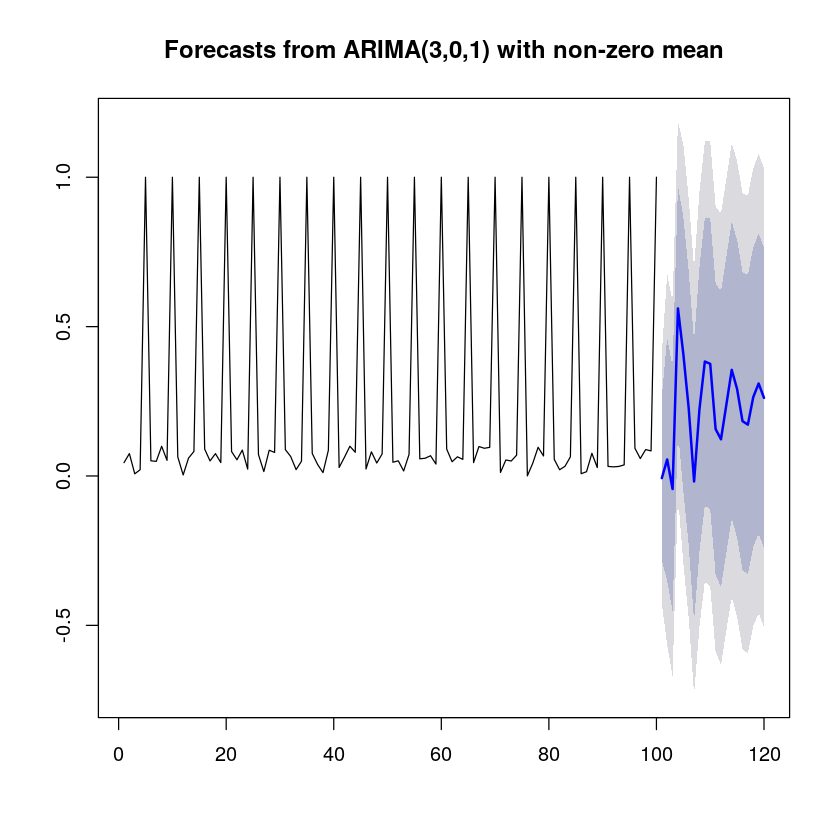

In [85]:
plot(forecast(bfit,h=20))

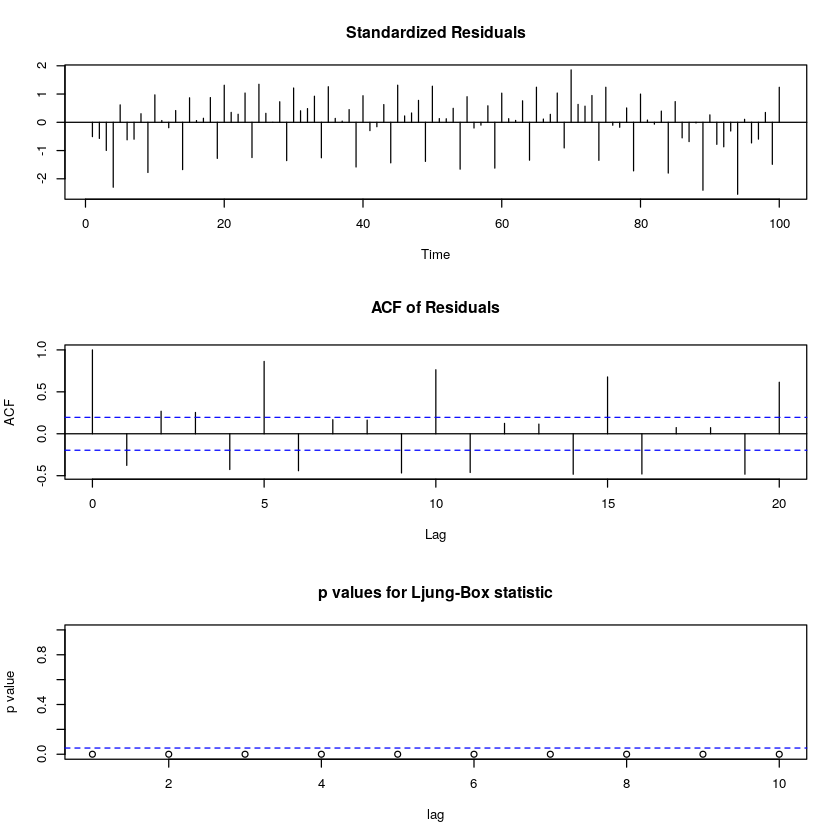

In [86]:
tsdiag(bfit)